In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import calendar
from matplotlib import pyplot as plt
import matplotlib.ticker as ptick 
import scipy.stats as stats
import glob

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import seaborn as sns
import japanize_matplotlib


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Mean Absolute Error(MAE)用 
from sklearn.metrics import mean_absolute_error 
# Root Mean Squared Error(RMSE)用 
from sklearn.metrics import mean_squared_error

In [ ]:
ドイツ	226.41	53.66	280.07	19.16
フランス	113.16	7.68	120.84	6.36
イギリス	52.79	21.62	74.42	29.05
EPEX_SPOT全体	501.57	91.67	593.28	15.45
日本(JEPX)	292.51	2.58	295.09	0.87


In [2]:
x_list = ['ドイツ','フランス','イギリス','EPEX_SPOT全体','日本']

In [3]:
spot_v =[226.41,113.16,52.79,501.57,285.37]
intra_v =[53.66,7.68,21.62,91.67,2.14]
percent = [19.16,6.36,29.05,15.45,0.75
]

In [9]:
plt.rcParams['font.family']='MS Mincho'

plt.rcParams['font.size']=16

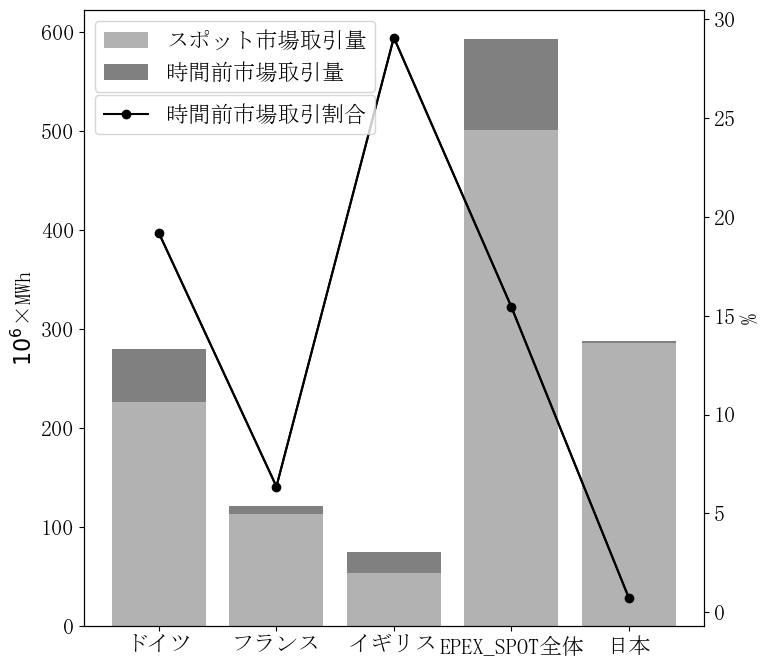

In [17]:

fig = plt.figure(figsize=(8,8))
ax1 = fig.subplots()
ax2 = ax1.twinx()
ax1.bar(x_list,spot_v,color = 'gray',alpha =0.6,label = 'スポット市場取引量')

ax1.bar(x_list,intra_v,bottom=spot_v,color = 'gray',label = '時間前市場取引量')
ax1.set_ylabel('$10^6$×MWh'
# ,rotation =0
)
ax1.legend()

ax2.plot(x_list,percent,color = 'black')
ax2.plot(x_list,percent,color = 'black',label = '時間前市場取引割合',marker='o'
# ,facecolor='None'
)
ax2.set_ylabel('%'
# ,rotation = 0
)
ax2.legend(bbox_to_anchor=(0,0.78),loc='lower left',prop={'family':'MS Mincho'})
plt.savefig('../../../卒論関連書類/画像/卒論用画像/グラフ＿卒論貼り付け用＿一次提出/各国比較時間前市場割合.png')
ax2.set_xticks(x_list,fontname ='MS Mincho')
ax2.set_xticklabels(x_list,fontname='MS Mincho')
# 各国比較時間前市場割合.png')
plt.show()

In [2]:
# 日本の２０１９年の取引量を調べる


df = pd.read_csv('../../../卒論関連書類/データ/king_history/king_history1/king19.csv')

In [5]:
df['DateTime']=pd.to_datetime(df['DateTime'])
df= df[df['DateTime'].dt.year==2019]

In [11]:
volume_intra = df['intra_volume（MWh/h）'].values *0.5
volume_spot = df['spot_volume(kWh)'].values

In [12]:
volume_intra.sum()/10**6

2.1368015500000004

In [15]:
volume_spot.sum()/10**9

285.3740721

In [32]:
(volume_intra.sum()/10**6)/(volume_spot.sum()/10**9 +volume_intra.sum()/10**6)*100

0.7432072126083225